<a href="https://colab.research.google.com/github/gforien/prj-cqn/blob/master/PRJCQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

In [1]:
%%capture
!pip install qiskit ipywidgets
!pip install qiskit[visualization]
!pip install python-dotenv

In [2]:
# Getting your API key
!cp "/content/drive/My Drive/qiskit-config.txt" /home/.env
from dotenv import load_dotenv, find_dotenv
print(f"environment file found at: {find_dotenv()}")
load_dotenv()
import os
print(os.getenv("IBMQ_KEY"))

In [7]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
%matplotlib inline
# Loading your IBM Q account(s)
IBMQ.save_account(os.getenv("IBMQ_KEY"), overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-16 08:17:37,479: Credentials are already in use. The existing account in the session will be replaced.


# Circuit

In [8]:
# Initialization:
circuit = QuantumCircuit(2, 2)
# c = |00>

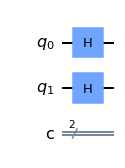

In [9]:
# Step 1 - Superposition
circuit.h(0)
circuit.h(1)
circuit.draw('mpl')
# c = |00> + |01> + |10> + |11>

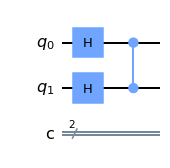

In [10]:
# Step 2 - Oracle = on tag le qubit 1
circuit.cz(0, 1)
circuit.draw('mpl')

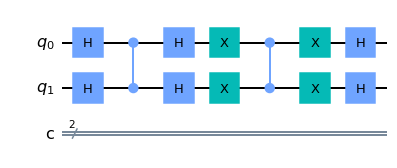

In [11]:
# Step 3 - Reflection
circuit.h(0)
circuit.h(1)
circuit.x(0)
circuit.x(1)

circuit.cz(0, 1)

circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.h(1)

circuit.draw('mpl')

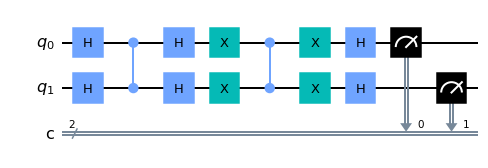

In [12]:
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
circuit.draw('mpl')

# Exécution

In [26]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
# backend = Aer.get_backend('qasm_simulator')
backend = provider.get_backend('ibmq_ourense')

In [29]:
job = execute(circuit, backend, shots=2048)

In [30]:
result = job.result()
result.get_counts()
# on imbq_ourense => {'00': 24, '01': 135, '10': 354, '11': 3583}

{'00': 8, '01': 61, '10': 110, '11': 1869}